In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

In [40]:
#Lendo a Base de dados
base_dados = pd.read_csv('StudentsPerformance.csv')

#dimensões da base de dados 
base_dados.shape

(1000, 8)

In [41]:
#Head 
base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


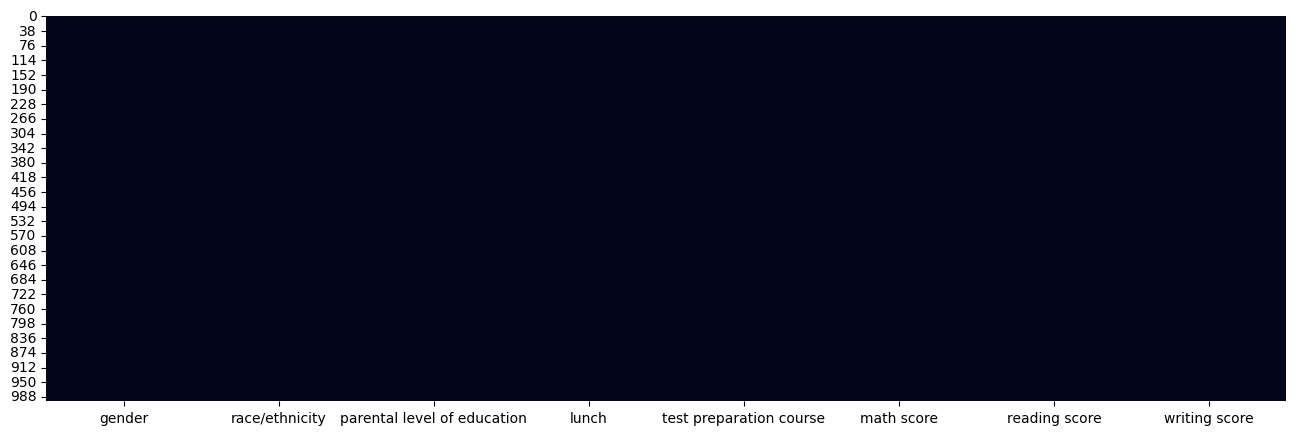

In [42]:
#Análise de campos nulos
Nulos = base_dados.isnull()
plt.figure(figsize=(16,5))

sns.heatmap(Nulos, cbar=False); #cbar=False remove a barra de cores 



In [43]:
#Unicos
base_dados.nunique()    #Retorna o número de valores únicos em cada coluna 

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [44]:
#verificar se há valores duplicados 
base_dados.duplicated().sum()    #Retorna a quantidade de valores duplicados  

np.int64(0)

In [45]:
#Analise estatistica
base_dados.describe()    #Retorna a análise estatística da base de dados   

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [46]:
#informações sobre a base de dados  
base_dados.info()    #Retorna informações sobre a base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
base_dados['gender'].value_counts(normalize=True) * 100   #Retorna a quantidade de valores únicos em cada coluna
#51.5% dos estudantes são do sexo feminino e 48.5% são do sexo masculino    

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [48]:
base_dados['race/ethnicity'].value_counts(normalize=True) * 100  
# O grupo c é o que tem mais alunos, com 31,9% dos alunos, seguido pelo grupo D com 26,2% dos alunos.   

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

In [49]:
base_dados['parental level of education'].value_counts(normalize=True) * 100   
   #60% dos pais não possuem graduação ou mais

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

In [50]:
base_dados['lunch'].value_counts(normalize=True) * 100  
#35% dos estudantes não possuem plano de refeição   

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [51]:
base_dados['test preparation course'].value_counts(normalize=True) * 100   
#64.5% dos estudantes não fizeram curso preparatório para o teste   

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

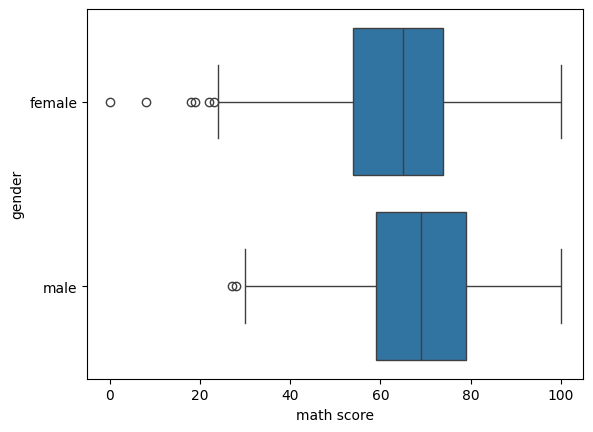

In [52]:
sns.boxplot(data=base_dados, x='math score', y='gender');   #Retorna um gráfico de caixa para a coluna math score   
#de acordo com o gráfico, os homens possuem uma méida um pouco maior que as mulheres em mateática    
#há uma quantidade maior de outliers no sexo feminino ou seja, houveram muitas notas zeradas em matemática das mulheres em relação aos homens

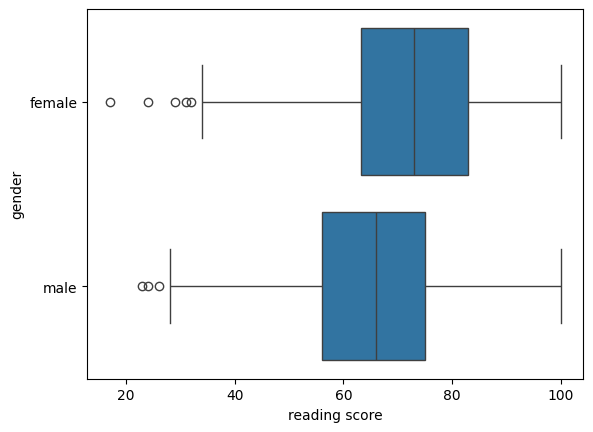

In [53]:
sns.boxplot(data=base_dados, x='reading score', y='gender');
#de acordo com o gráfico, as mulheres possuem uma média maior que os homens em leitura, mas as mulheres
#  possuem mais outliers negativos que os homens, ou seja, houveram mais notas zeradas em leitura das mulheres em relação aos homens   

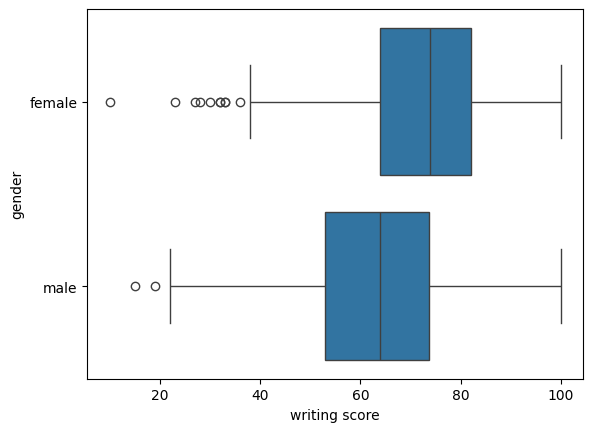

In [54]:
sns.boxplot(data=base_dados, x='writing score', y='gender');
#de acordo com o gráfico, as mulheres possuem uma média maior que os homens em escrita, mas as mulheres
#possuem mais outliers negativos que os homens, ou seja, houveram mais notas zeradas em escrita das mulheres em relação aos homens  

In [55]:
base_dados.groupby(by=['gender']).describe()['math score'].reset_index() 

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


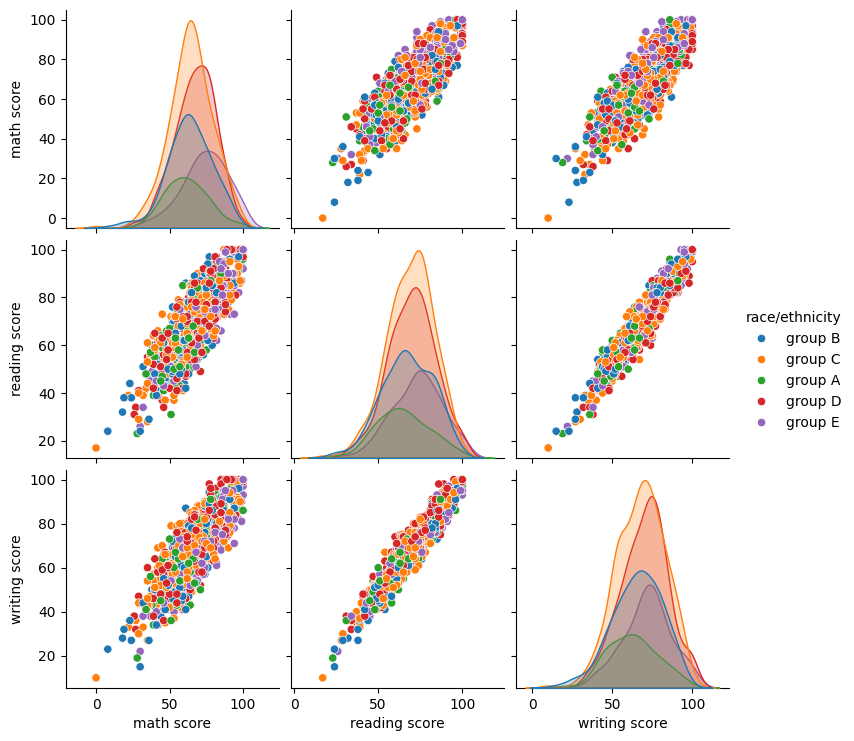

In [ ]:

sns.pairplot(base_dados, hue='race/ethnicity');

    # O grupo C  possui o maior indice de picos de notas altas seguido pelo grupo D

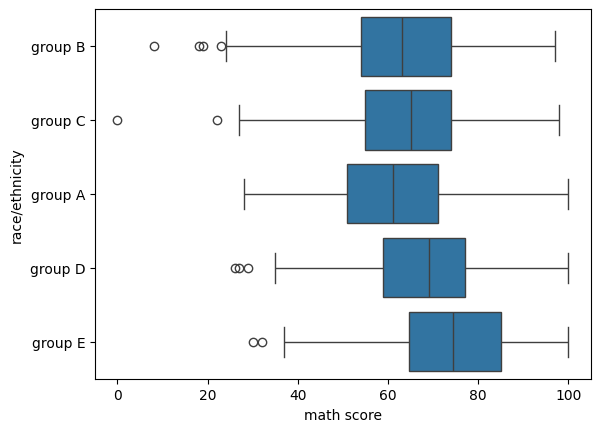

In [ ]:
sns.boxplot( data=base_dados, x='math score', y='race/ethnicity');
#O grupo E possui a maior média em matemática.

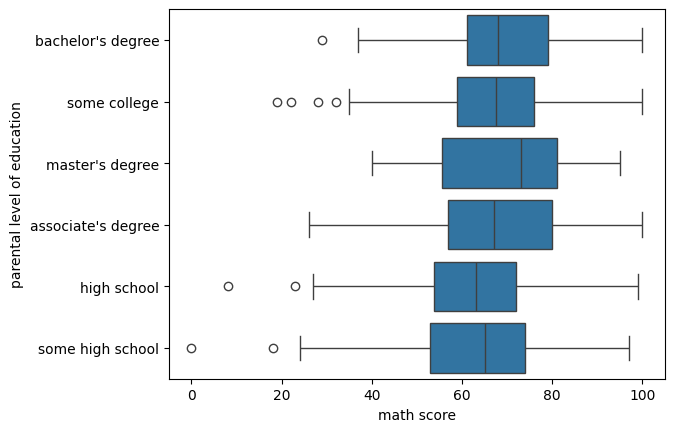

In [ ]:
sns.boxplot(data=base_dados, x='math score', y='parental level of education');
#Os pais com mestrado possuem a maior média em matemática

In [ ]:
base_dados.groupby(by=['parental level of education']).describe()['math score'].reset_index()   
#Os pais com mestrado possuem a maior média em matemática
#os pais com ensino médio possuem a menor média em matemática   

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


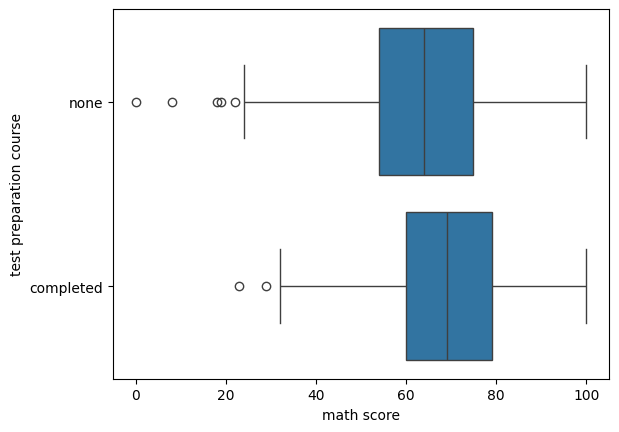

In [ ]:
sns.boxplot(data=base_dados, x='math score', y='test preparation course');  
#Os alunos que fizeram o curso preparatório possuem uma média um pouco maior que os alunos que não fizeram o curso preparatório
#os alunos que não fizeram o curso preparatório de matemática possuem mais outliers negativos, ou seja, houveram mais notas zeradas dos alunos que não fizeram o curso preparatório   

In [ ]:
base_dados.groupby(by=['test preparation course']).describe()['math score'].reset_index()   
#Os alunos que fizeram o curso preparatório possuem uma média um pouco maior que os alunos que não fizeram o curso preparatório 

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


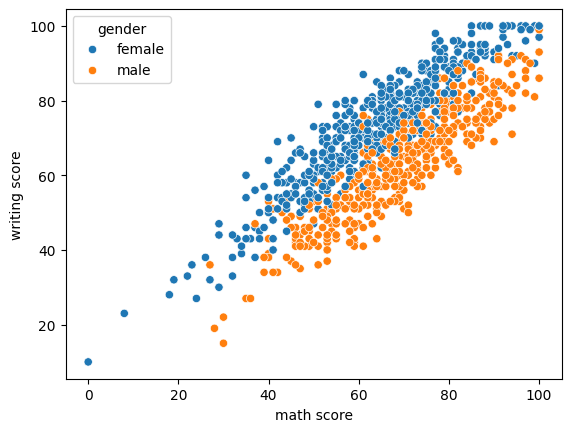

In [ ]:
sns.scatterplot(data=base_dados, x='math score', y='writing score', hue='gender');